# Introduction
This main goal of this project is to analyze the many ways that membership holders and casual users differ from one another. This project is a part of the Google Data Analytics Professional Certificate and draws upon a data set from a fictional bike sharing company *Cyclistic*. The data is composed of rider information over 2022.
## Key Tasks
* Our main goal is to convert more casual riders into membership holders by better understanding how the two differ from one another.
* Namely, we want to understand how the bikes are used differently between the two types of riders.

In [1]:
#loading tidyverse
library(tidyverse) # metapackage of all tidyverse packages
#Listing all data in folders
list.files(path = "../input/bike-share-trip-data")
#R was unable to locate our CSVs and was looking in working directory
#As a bandaid on the wound I decided to change the working directory until
#a more permanent fix can be found
setwd("../input/bike-share-trip-data")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "202201-divvy-tripdata.csv" "202202-divvy-tripdata.csv"
 [3] "202203-divvy-tripdata.csv" "202204-divvy-tripdata.csv"
 [5] "202205-divvy-tripdata.csv" "202206-divvy-tripdata.csv"
 [7] "202207-divvy-tripdata.csv" "202208-divvy-tripdata.csv"
 [9] "202209-divvy-tripdata.csv" "202210-divvy-tripdata.csv"
[11] "202211-divvy-tripdata.csv" "202212-divvy-tripdata.csv"

# Preparing and Cleaning our data
Rather than using read_csv() 12 times I decided to impliment a function to assign all of our CSV files into one data frame

In [2]:
#Reading in all of our data
#Only works when working directory is the ../input/bike-share... folder
df <-
  list.files(path = "/kaggle/input/bike-share-trip-data", pattern = "*.csv") %>% 
  map_df(~read_csv(.))

Rows: 103770 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 115609 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 284042 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

You may notice that we have to switch directories a few times. This is a draw back to the function above. It saved us time but we need to be wary of our working directory.

In [3]:
#Switching back to our initial directory
head(df)
setwd('/kaggle/working/')

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member


In [4]:
#Adding length of trip and day of week it took place to our data frame
day_week <- weekdays(as.Date(df$started_at))
df2 = df %>%
mutate(ride_length = round(difftime(ended_at, started_at, units = "min"),2),day_of_week = day_week)
head(df2)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,2.95 mins,Thursday
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,4.35 mins,Monday
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,4.35 mins,Tuesday
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,14.93 mins,Tuesday
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,6.03 mins,Thursday
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,3.37 mins,Tuesday


In [5]:
#Counting membership holders
df2 %>%
count(member_casual)
#Checking for NA values
test <- as.character(unlist(strsplit(colnames(df2), split=" ")))
for (i in test){
    cat(sum(is.na(df2[[i]]))," NAs inside of",i,"\n")
}

member_casual,n
<chr>,<int>
casual,2322032
member,3345685


0  NAs inside of ride_id 
0  NAs inside of rideable_type 
0  NAs inside of started_at 
0  NAs inside of ended_at 
833064  NAs inside of start_station_name 
833064  NAs inside of start_station_id 
892742  NAs inside of end_station_name 
892742  NAs inside of end_station_id 
0  NAs inside of start_lat 
0  NAs inside of start_lng 
5858  NAs inside of end_lat 
5858  NAs inside of end_lng 
0  NAs inside of member_casual 
0  NAs inside of ride_length 
0  NAs inside of day_of_week 


# Summarizing our data
* In our data exploration we find that we attain significant outliers in ride length. 
* Without accounting for outliers, our most common riding day is saturday and the average ride lasts for about 20 minutes for both member holders and casual riders.

In [6]:
#Tallying all days of the week
tallied <- df2 %>% 
    group_by(day_of_week) %>% 
    summarize(frequency = n()) %>% 
    ungroup()
#Mode of all days of the week
mode_day_week <- tallied %>%
    filter(frequency == max(frequency)) %>%
    summarize(mode_day_week = day_of_week)
#summarizing our data
summary_of_df2 <- df2 %>%
    summarize(avg_ride_len = mean(ride_length), min_ride_len = min(ride_length), max_ride_len = max(ride_length)) %>%
    mutate(mode_day_week)
tallied
summary_of_df2

day_of_week,frequency
<chr>,<int>
Friday,801787
Monday,751014
Saturday,916471
Sunday,776259
Thursday,841591
Tuesday,782372
Wednesday,798223


avg_ride_len,min_ride_len,max_ride_len,mode_day_week
<drtn>,<drtn>,<drtn>,<chr>
19.44328 mins,-10353.35 mins,41387.25 mins,Saturday


Here we have our first outlier, min and max ride length are both way too out of a realistic range. Seeing that we are assuming that our rides are lasting for a single day, there is no way we can have a rider using one of our bikes for 41,000 + minutes. This can be attributed to a number of things, for now lets leave this for further investigation.

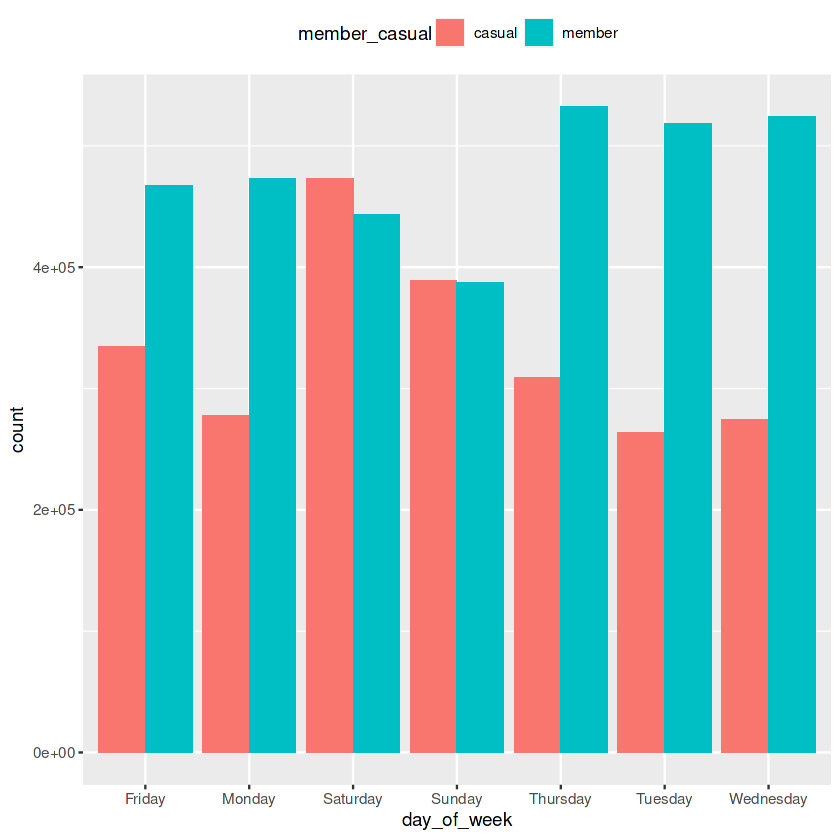

In [7]:
ggplot(data = df2,aes(x=day_of_week,fill=member_casual)) + geom_bar(position = position_dodge()) + theme(legend.position = "top")

In [8]:
df2 %>%
    group_by(day_of_week) %>%
    summarize(count_of_day = n())%>%
    arrange(-count_of_day)

day_of_week,count_of_day
<chr>,<int>
Saturday,916471
Thursday,841591
Friday,801787
Wednesday,798223
Tuesday,782372
Sunday,776259
Monday,751014


# Membership Holders vs Casual Riders
Lets See How Membership Holders Differ from Casual Riders

In [9]:
membership_holders <- df2 %>%
    filter(member_casual == "member")
casual_riders <- df2 %>%
    filter(member_casual == "casual")
head(membership_holders)
head(casual_riders)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,4.35 mins,Tuesday
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,6.03 mins,Thursday
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,3.37 mins,Tuesday
BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,41.95434,-87.68608,41.95283,-87.64999,member,16.57 mins,Sunday
81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,41.92560,-87.65371,41.93193,-87.67786,member,12.07 mins,Saturday
154222B86A338ABD,electric_bike,2022-01-17 07:34:41,2022-01-17 08:00:08,Racine Ave & 15th St,13304,Clinton St & Washington Blvd,WL-012,41.86125,-87.65650,41.88338,-87.64117,member,25.45 mins,Monday


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,2.95 mins,Thursday
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,4.35 mins,Monday
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,14.93 mins,Tuesday
E119D4E6BF686601,electric_bike,2022-01-08 05:36:40,2022-01-08 05:46:40,Michigan Ave & Jackson Blvd,TA1309000002,St. Clair St & Erie St,13016,41.87785,-87.62406,41.89435,-87.62280,casual,10.00 mins,Saturday
9D4AAF43A011FC59,electric_bike,2022-01-18 08:03:16,2022-01-18 08:08:00,California Ave & Altgeld St,15646,Milwaukee Ave & Rockwell St,13242,41.92665,-87.69766,41.92020,-87.69266,casual,4.73 mins,Tuesday
1C2362DAD4090D8A,electric_bike,2022-01-03 00:12:42,2022-01-03 00:17:50,Indiana Ave & 31st St,TA1308000036,Indiana Ave & 40th St,13083,41.83882,-87.62183,41.82168,-87.62160,casual,5.13 mins,Monday


In [10]:
#Tallying all days of the week for members
tallied_member_days <- membership_holders %>% group_by(day_of_week) %>% 
    summarize(frequency = n(), average_ride_len = mean(ride_length)) %>%
    arrange(-frequency)%>%
    ungroup()
#Mode of all days of the week for members
mode_day_member <- tallied_member_days %>%
    filter(frequency == max(frequency)) %>%
    summarize(mode_day_week = day_of_week)
tallied_member_days
membership_holders %>%
    summarize(average_ride_length = mean(ride_length), max_ride_len = max(ride_length), min_ride_len = min(ride_length)) %>%
    mutate(mode_day_member)

day_of_week,frequency,average_ride_len
<chr>,<int>,<drtn>
Thursday,532261,12.29226 mins
Wednesday,523869,12.08507 mins
Tuesday,518626,12.12874 mins
Monday,473339,12.27000 mins
Friday,467086,12.53068 mins
Saturday,443281,14.13981 mins
Sunday,387223,14.02914 mins


average_ride_length,max_ride_len,min_ride_len,mode_day_week
<drtn>,<drtn>,<drtn>,<chr>
12.71042 mins,1559.9 mins,-10353.35 mins,Thursday


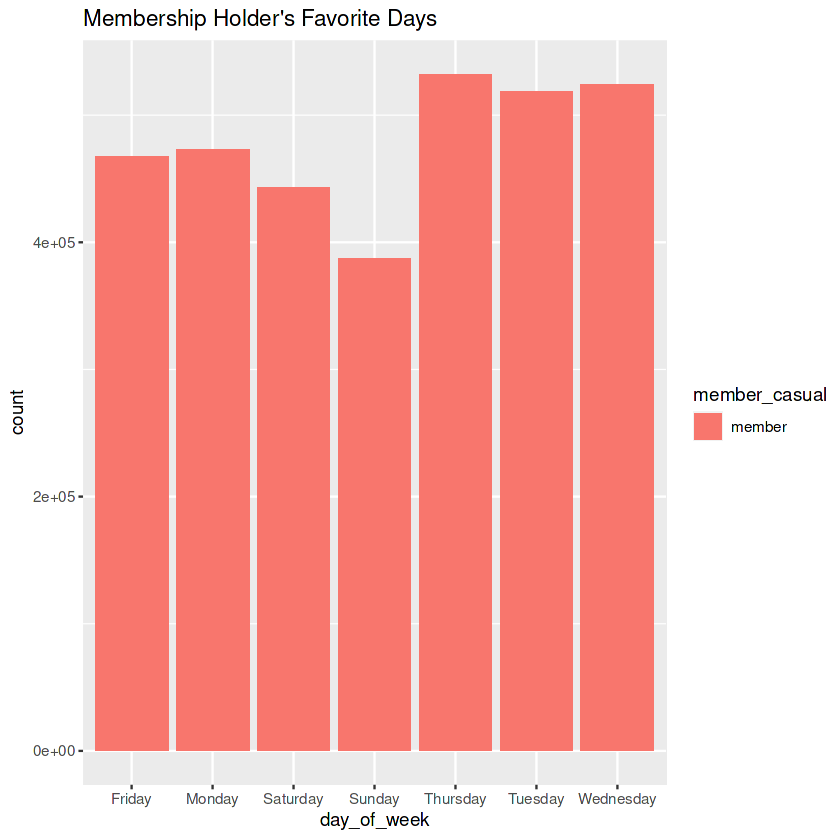

In [11]:
ggplot(data = membership_holders) + geom_bar(mapping = aes(x=day_of_week,fill=member_casual)) + labs(title = "Membership Holder's Favorite Days")

Membership holders tend to ride every day with a preference for Tuesday Wednesday and Thursday.

In [12]:
tallied_casual_days <- casual_riders %>% 
    group_by(day_of_week) %>% 
    filter(ride_length > 0 & ride_length < 120) %>%
    summarize(frequency = n(), average_ride_len = mean(ride_length)) %>%
    arrange(-frequency)%>%
    ungroup()
#Mode of all days of the week for members
mode_day_casual <- tallied_casual_days %>%
    filter(frequency == max(frequency)) %>%
    summarize(mode_day_week = day_of_week)
tallied_casual_days
casual_riders %>%
    summarize(average_ride_length = mean(ride_length), max_ride_len = max(ride_length), min_ride_len = min(ride_length)) %>%
    mutate(mode_day_casual)

day_of_week,frequency,average_ride_len
<chr>,<int>,<drtn>
Saturday,463994,21.04444 mins
Sunday,380892,21.29919 mins
Friday,329830,17.86860 mins
Thursday,305152,17.02070 mins
Monday,272699,19.17604 mins
Wednesday,270892,16.57446 mins
Tuesday,259918,16.96846 mins


average_ride_length,max_ride_len,min_ride_len,mode_day_week
<drtn>,<drtn>,<drtn>,<chr>
29.14429 mins,41387.25 mins,-137.42 mins,Saturday


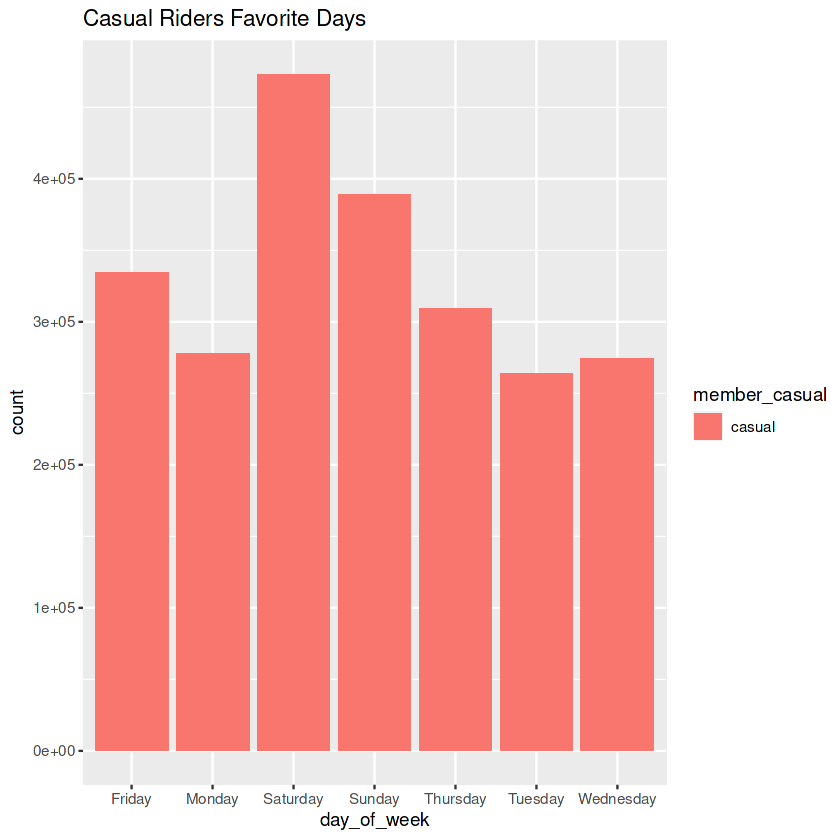

In [13]:
ggplot(data = casual_riders) + geom_bar(mapping = aes(x=day_of_week,fill=member_casual)) + labs(title = "Casual Riders Favorite Days")

Casual Riders ride on the weekdays a lot less and tend to ride on Saturday and Sunday the most.

## Here we can see a side by side comparison of the two. Membership holders are using bikes much more frequently then casual riders with the only exception being *Saturday* & *Sunday*.
* We might like to assume that Membership riders are making our bikes a part of their every day commutes while Casual riders are riding for fun every once in a while.
* The reason we may make this assumption is both casual riders and membership holders riderhip seems to match up on sundays while ridership tapers off for casual riders again until the weekend hits.

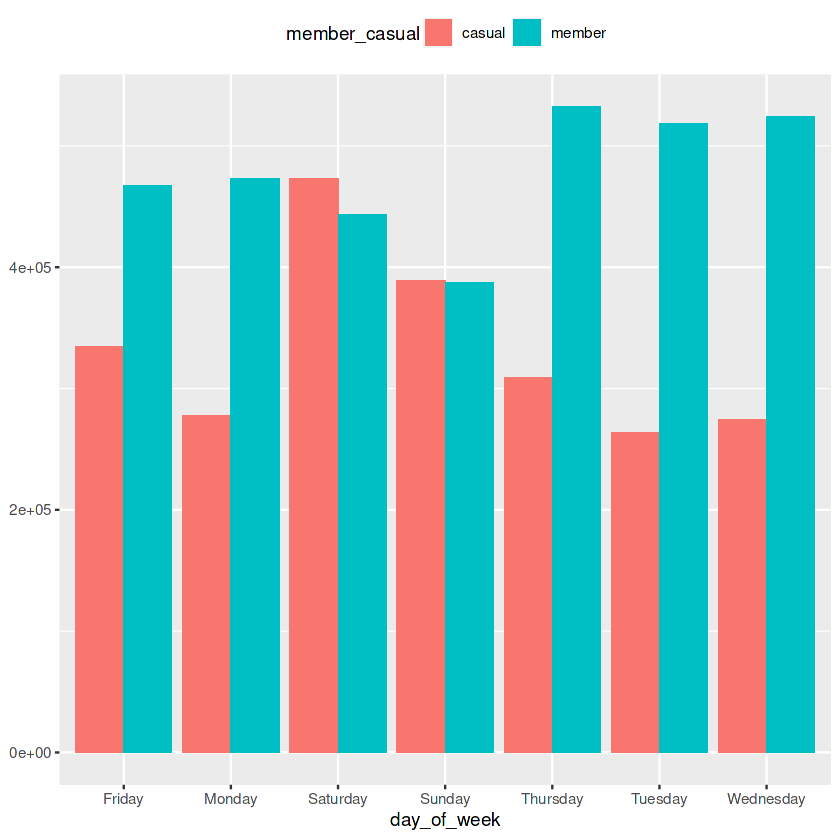

In [14]:
ggplot(data=df2, aes(x = day_of_week, fill = member_casual)) +
  geom_bar(position = position_dodge()) +
  labs(y = NULL) +
  theme(legend.position = "top")

# Discrepencies in Ride Length
One quick look at our ridership summaries from earlier reveal a strong difference in ride length between groups.

In [15]:
#Most common ride days for casual riders and members
tallied_casual_days
tallied_member_days

day_of_week,frequency,average_ride_len
<chr>,<int>,<drtn>
Saturday,463994,21.04444 mins
Sunday,380892,21.29919 mins
Friday,329830,17.86860 mins
Thursday,305152,17.02070 mins
Monday,272699,19.17604 mins
Wednesday,270892,16.57446 mins
Tuesday,259918,16.96846 mins


day_of_week,frequency,average_ride_len
<chr>,<int>,<drtn>
Thursday,532261,12.29226 mins
Wednesday,523869,12.08507 mins
Tuesday,518626,12.12874 mins
Monday,473339,12.27000 mins
Friday,467086,12.53068 mins
Saturday,443281,14.13981 mins
Sunday,387223,14.02914 mins


## However, our data is *terribly* skewed. We need to filter through a large amount of it before we can make inferences about ride length.

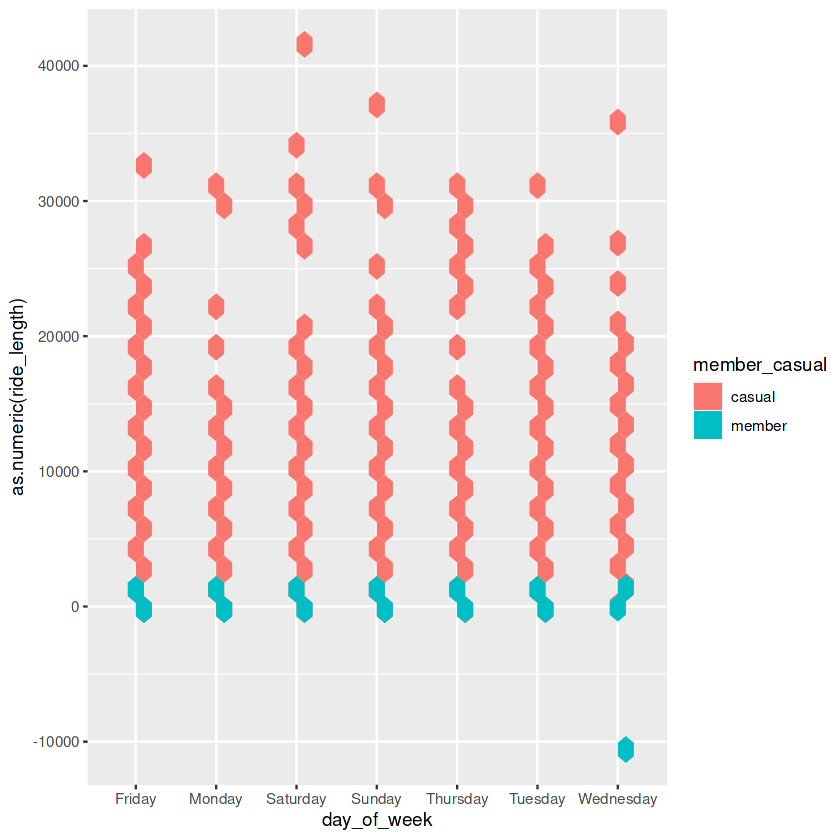

In [16]:
ggplot(df2,aes(x=day_of_week,y=as.numeric(ride_length), fill=member_casual)) + geom_hex()

# Getting Rid of Unusual Outliers
We don't know why there are trips in the thousands of minutes, for now we are going to look at a sample of the data where ride time doesn't exceed 2 hours. One thing we notice is that the majority of our outliers are casual members.

In [17]:
#getting rid of all unusual outliers
bike_share_filtered <- df2 %>%
    filter(ride_length > 0 & ride_length < 120)
head(bike_share_filtered)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,2.95 mins,Thursday
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,4.35 mins,Monday
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,4.35 mins,Tuesday
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,14.93 mins,Tuesday
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,6.03 mins,Thursday
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,3.37 mins,Tuesday


In [18]:
bike_share_filtered %>%
    group_by(day_of_week) %>% 
    summarize(frequency = n(), average_ride_len = mean(ride_length)) %>%
    arrange(-frequency)%>%
    ungroup()

day_of_week,frequency,average_ride_len
<chr>,<int>,<drtn>
Saturday,906227,17.22075 mins
Thursday,836374,13.53696 mins
Friday,795911,14.25300 mins
Wednesday,793884,13.17625 mins
Tuesday,777527,13.19730 mins
Sunday,767101,17.16731 mins
Monday,745139,14.30729 mins


Our average ride length now looks significantly different from how it did before.

In [19]:
#Filtering into two separate dataframes
member_filtered <- bike_share_filtered %>%
    filter(member_casual == "member")
casual_filtered <- bike_share_filtered %>%
    filter(member_casual == "casual")

In [20]:
head(member_filtered)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,4.35 mins,Tuesday
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,6.03 mins,Thursday
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,3.37 mins,Tuesday
BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,41.95434,-87.68608,41.95283,-87.64999,member,16.57 mins,Sunday
81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,41.92560,-87.65371,41.93193,-87.67786,member,12.07 mins,Saturday
154222B86A338ABD,electric_bike,2022-01-17 07:34:41,2022-01-17 08:00:08,Racine Ave & 15th St,13304,Clinton St & Washington Blvd,WL-012,41.86125,-87.65650,41.88338,-87.64117,member,25.45 mins,Monday


In [21]:
member_rider_summary = member_filtered %>% 
    group_by(day_of_week) %>%
    summarize(count_of_day = n(), average_ride_time = mean(as.numeric(ride_length))) %>%
    arrange(-count_of_day)
casual_rider_summary = casual_filtered %>% 
    group_by(day_of_week) %>%
    summarize(count_of_day = n(), average_ride_time = mean(as.numeric(ride_length))) %>%
    arrange(-count_of_day)
member_rider_summary
casual_rider_summary

day_of_week,count_of_day,average_ride_time
<chr>,<int>,<dbl>
Thursday,531222,11.53579
Wednesday,522992,11.41610
Tuesday,517609,11.30361
Monday,472440,11.49697
Friday,466081,11.69437
Saturday,442233,13.20891
Sunday,386209,13.09230


day_of_week,count_of_day,average_ride_time
<chr>,<int>,<dbl>
Saturday,463994,21.04444
Sunday,380892,21.29919
Friday,329830,17.86860
Thursday,305152,17.02070
Monday,272699,19.17604
Wednesday,270892,16.57446
Tuesday,259918,16.96846


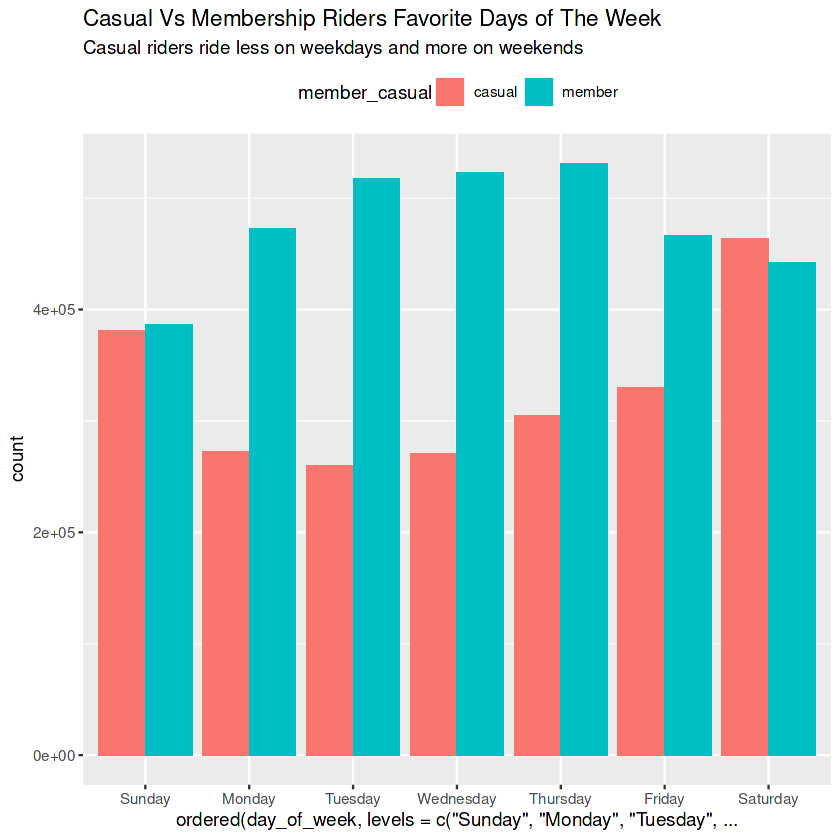

In [22]:
ggplot(data=bike_share_filtered, aes(x = ordered(day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")), fill = member_casual)) +
  geom_bar(position = position_dodge()) +
  labs(title = "Casual Vs Membership Riders Favorite Days of The Week", subtitle = "Casual riders ride less on weekdays and more on weekends") +
  theme(legend.position = "top")

Membership holders still hold a higher ridership for almost all days except for the weekend. However, Casual riders are still averaging a higher ride length average.

## Lastly lets check the amount of NAs in each respective DataFrame

In [23]:
member_filter_col <- as.character(unlist(strsplit(colnames(member_filtered), split=" ")))
for (i in member_filter_col){
    cat(sum(is.na(member_filtered[[i]]))," NAs inside of",i,"\n")
}


0  NAs inside of ride_id 
0  NAs inside of rideable_type 
0  NAs inside of started_at 
0  NAs inside of ended_at 
484299  NAs inside of start_station_name 
484299  NAs inside of start_station_id 
481407  NAs inside of end_station_name 
481407  NAs inside of end_station_id 
0  NAs inside of start_lat 
0  NAs inside of start_lng 
5  NAs inside of end_lat 
5  NAs inside of end_lng 
0  NAs inside of member_casual 
0  NAs inside of ride_length 
0  NAs inside of day_of_week 


In [24]:
casual_filter_col <- as.character(unlist(strsplit(colnames(casual_filtered), split=" ")))
for (i in casual_filter_col){
    cat(sum(is.na(casual_filtered[[i]]))," NAs inside of",i,"\n")
}

0  NAs inside of ride_id 
0  NAs inside of rideable_type 
0  NAs inside of started_at 
0  NAs inside of ended_at 
346268  NAs inside of start_station_name 
346268  NAs inside of start_station_id 
401997  NAs inside of end_station_name 
401997  NAs inside of end_station_id 
0  NAs inside of start_lat 
0  NAs inside of start_lng 
363  NAs inside of end_lat 
363  NAs inside of end_lng 
0  NAs inside of member_casual 
0  NAs inside of ride_length 
0  NAs inside of day_of_week 


Interestingly enough, we acutally find that Members have more NA values than casual members.

In [25]:
df2_na_col <- df2 %>%
    filter(is.na(start_station_name) | is.na(end_station_name))
head(df2_na_col)
dim(df2_na_col)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<drtn>,<chr>
857B71104B437577,electric_bike,2022-01-04 17:08:16,2022-01-04 17:12:15,NA,NA,Lockwood Ave & Wrightwood Ave,312,41.93000,-87.76000,41.93000,-87.76000,casual,3.98 mins,Tuesday
88276B47FFBB9910,electric_bike,2022-01-25 07:39:35,2022-01-25 07:41:01,Larrabee St & Kingsbury St,TA1306000009,NA,NA,41.89763,-87.64339,41.90000,-87.64000,member,1.43 mins,Tuesday
1B66EC28DD618680,electric_bike,2022-01-21 14:26:57,2022-01-21 14:32:17,Central Park Ave & Ohio St,369,NA,NA,41.89000,-87.72000,41.90000,-87.71000,member,5.33 mins,Friday
565EEF32A9B65000,electric_bike,2022-01-11 21:51:25,2022-01-11 21:55:27,NA,NA,Ashland Ave & Grace St,13319,41.95000,-87.65000,41.95069,-87.66870,member,4.03 mins,Tuesday
C1C1910260144C76,electric_bike,2022-01-05 03:25:22,2022-01-05 03:43:32,NA,NA,Ashland Ave & Grace St,13319,41.92000,-87.69000,41.95069,-87.66870,member,18.17 mins,Wednesday
A3CE921272003727,electric_bike,2022-01-18 07:01:29,2022-01-18 07:14:08,NA,NA,Southport Ave & Clybourn Ave,TA1309000030,41.91000,-87.69000,41.92077,-87.66371,member,12.65 mins,Tuesday


[1] 1298357      15

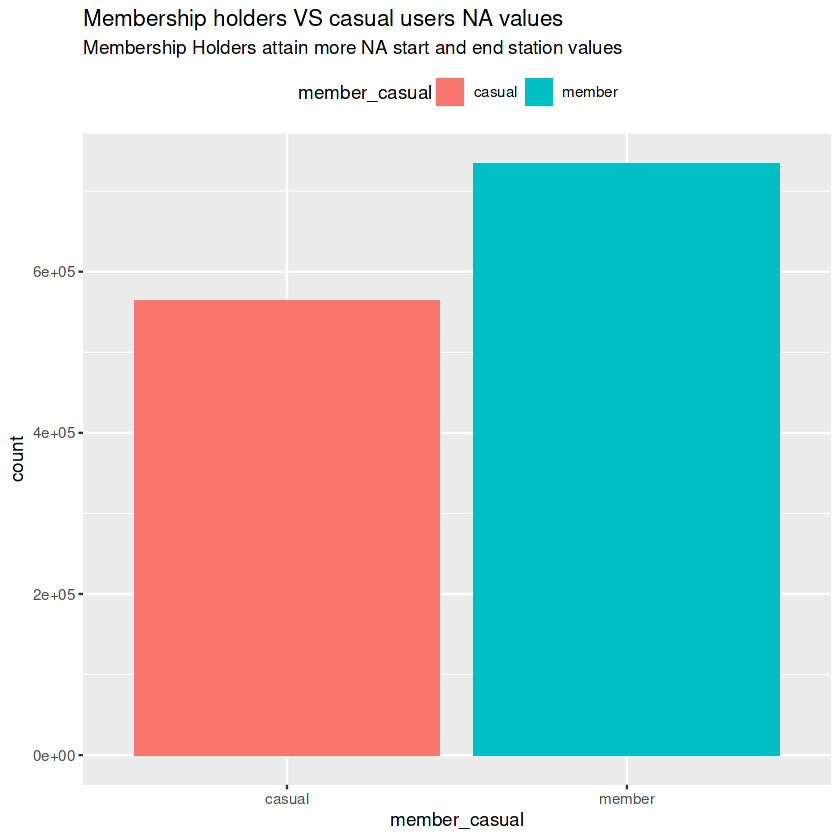

In [26]:
ggplot(data = df2_na_col, aes(x=member_casual,fill=member_casual)) + geom_bar(position = position_dodge()) + 
labs(title = "Membership holders VS casual users NA values", subtitle="Membership Holders attain more NA start and end station values") +
theme(legend.position = "top")

Membership holders attain a higher amount of NA values in our data set. This is for both Start and end station names in our data. However, Casual riders have much more End Lattitude and Longitude values. Once more, further investigation will be required to determine the reason for this.

# Last thoughts
* Theft may help explain our missing bikes for casual members
* NA values for membership holders will require further investigation